# P2 submission
#### Dataset analyzed: Titanic

# 1. Data wrangling and Exploration
I'll start below with exploring to get a sense of the data, what variables we have, how the data is presented, etc.

In [1]:
#importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

#seaborn settings
sns.set_style("whitegrid")

#loading dataset
filename = '/Users/leo/Dropbox/udacity_nanodegree/titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [2]:
#checking the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking correlation between Survived and other variables
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
# playing arround with the data to make up my mind (checking counts and proportion of survivals)
titanic_df_survivals = titanic_df[titanic_df['Survived'] == 1]
titanic_df_deaths = titanic_df[titanic_df['Survived'] == 0]

num_passengers = titanic_df['PassengerId'].count()
num_survivals = titanic_df_survivals['PassengerId'].size
num_deaths = titanic_df_deaths['PassengerId'].size

proportion_of_survivals = num_survivals / float(num_passengers)

print 'num_passengers: {}'.format(num_passengers)
print 'num_survivals: {}'.format(num_survivals)
print 'num_deaths: {}'.format(num_deaths)
print 'total_passengers: {}'.format(num_survivals + num_deaths)
print 'proportion_of_survivals: {}'.format(proportion_of_survivals)


num_passengers: 891
num_survivals: 342
num_deaths: 549
total_passengers: 891
proportion_of_survivals: 0.383838383838


Populating the interactive namespace from numpy and matplotlib


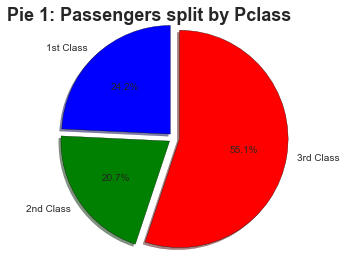

In [5]:
# graph to show the percentage of each Pclass in the whole sample
%pylab inline

sizes = titanic_df.groupby('Pclass').count()['PassengerId']
# print sizes
labels = ['1st Class', '2nd Class', '3rd Class']
explode = (0.05, 0.05, 0.05)
autopct = '%1.1f%%'
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct=autopct, startangle=90)
plt.title('Pie 1: Passengers split by Pclass', loc='left', size='18', weight='1000')
plt.axis('equal')
plt.show()

Populating the interactive namespace from numpy and matplotlib


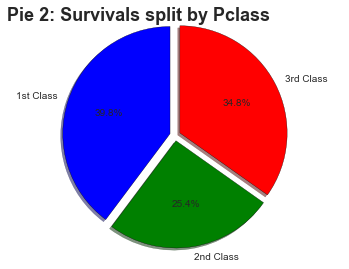

In [6]:
# graph to show the percentage of each Pclass from the survival subgroup
%pylab inline
sizes = titanic_df_survivals.groupby('Pclass').count()['PassengerId']
# print sizes
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct=autopct, startangle=90)
plt.title('Pie 2: Survivals split by Pclass', loc='left', size='18', weight='1000')
plt.axis('equal')
plt.show()

### By comparing Pie 1 and Pie 2 above it is clear that people from the 1st class had a better chance of surviving that people form the 3rd class. We will calculate this statistics down below. 

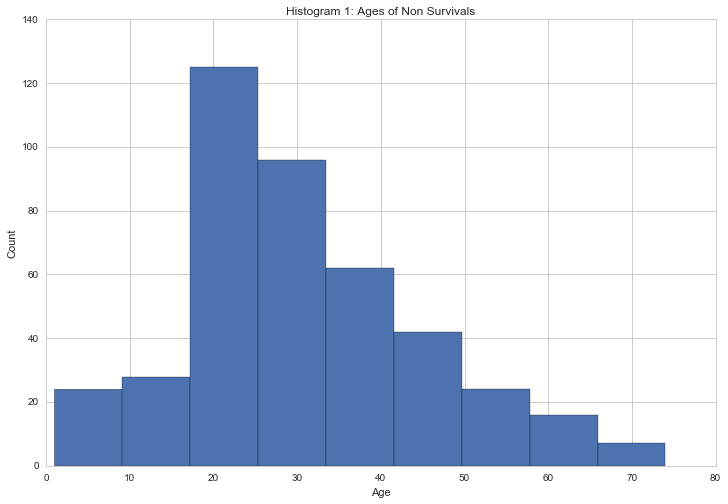

In [7]:
# checking a histogram of the passengers' ages
hist_all_passengers = titanic_df_deaths['Age'].hist(bins=9,figsize=(12, 8))
hist_all_passengers.set_xlabel("Age")
hist_all_passengers.set_ylabel("Count")
hist_all_passengers.set_title("Histogram 1: Ages of Non Survivals")

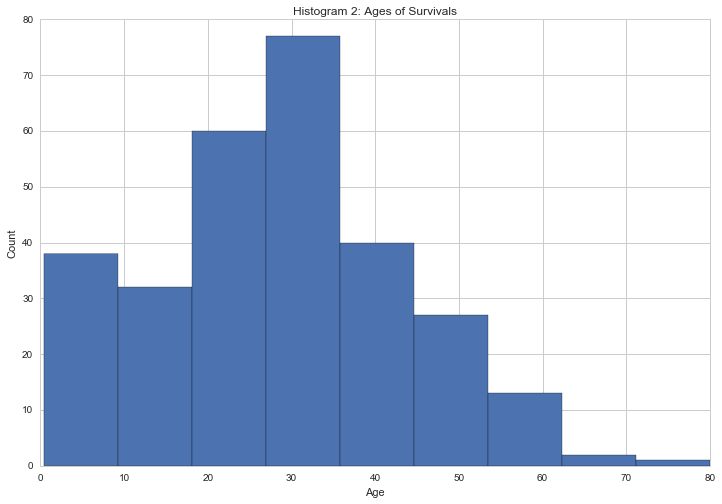

In [8]:
# checking a histogram of the survivals' ages
hist_survivals = titanic_df_survivals['Age'].hist(bins=9,figsize=(12, 8))
hist_survivals.set_xlabel("Age")
hist_survivals.set_ylabel("Count")
hist_survivals.set_title("Histogram 2: Ages of Survivals")

### The 2 histograms above doesn't give me much to see whether or not the Age had influenced the chance of survival of the passengers. I'll investigate this further with some box plots.

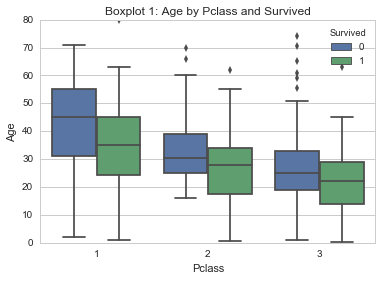

In [9]:
ax = sns.boxplot(data=titanic_df, x="Pclass", y="Age", hue="Survived")
ax.set_title("Boxplot 1: Age by Pclass and Survived")

### The boxplot above shows that the Survived subgroup is older in average than the non Survived subgroub and that it happens no matter in which Pclass the passenger is. I'll check if that this is statitically significant further down.

Populating the interactive namespace from numpy and matplotlib
Sex
female     81
male      468
Name: PassengerId, dtype: int64


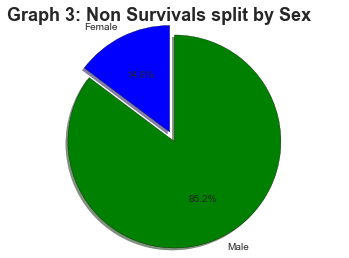

In [10]:
# graph to show the percentage of each Sex in the whole sample
%pylab inline

sizes = titanic_df_deaths.groupby('Sex').count()['PassengerId']
print sizes
labels = ['Female', 'Male']
explode = (0.05, 0.05)
autopct = '%1.1f%%'
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct=autopct, startangle=90)
plt.title('Graph 3: Non Survivals split by Sex', loc='left', size='18', weight='1000')
plt.axis('equal')
plt.show()

Populating the interactive namespace from numpy and matplotlib
Sex
female    233
male      109
Name: PassengerId, dtype: int64


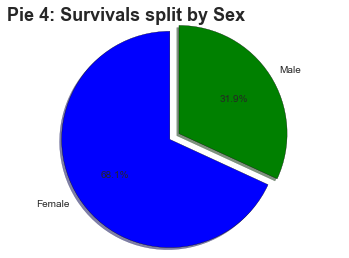

In [11]:
# graph to show the percentage of each Sex in the whole sample
%pylab inline

sizes = titanic_df_survivals.groupby('Sex').count()['PassengerId']
print sizes
labels = ['Female', 'Male']
explode = (0.05, 0.05)
autopct = '%1.1f%%'
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct=autopct, startangle=90)
plt.title('Pie 4: Survivals split by Sex', loc='left', size='18', weight='1000')
plt.axis('equal')
plt.show()

### By comparing Pie 1 and Pie 2 above it is clear that Females had a better chance of surviving than Males. I will calculate this statistics down below. 

# 2. Statistical Analysis Defined
I will check if the variabled below influenced the chance of an individual to survive the Titanic accident?<br>
Age<br>
Fare<br>
Pclass<br>
Sex

**Variables**<br>
The dependent variable is **Survived** (whether or not a given passanger survived the accident). I'll statistically test each of the independent variables listed 2 above.

## 2.1 Testing Age and Fare:
Age and Fare are numerical or quantitative variables and so I'll compare the difference of means.<br>

### 2.1.1 Method Used:
Two-tailed Independent sample t-test<br>
Alpha level of α = 0.05<br>

**T-Critical:**<br>
df values > 100 < 10000 for both variables<br>
using t-critical for df=100 and p=0.025 (two-tail t-Test)<br>
T-critical = (-1.984, 1.984)<br>

### 2.1.2 Age:

### 2.1.2.1 Hipothesis:
H0: The Age of a passenger did not affect his/her chance of surviving (Pclass and Survived are independent). <br>
H0: The Age of a passenger affects his/her chance of surviving (Pclass and Survived are not independent). 

### 2.2 Testing Pclass and Sex:
Chi-Square Test<br>
Alpha level of α = 0.05<br>

### 2.2.1 Method Used:
Two-tailed Independent sample t test<br>
Alpha level of α = 0.05<br>

**Chi-Squared Critical:**<br>
df = 1 for both variables<br>
Chi-Squared Critical = 3.841<br>

### 2.2.2 Pclass and Fare Hypothesis:
H0: The Pclass and Fare of a passenger did not affect his/her chance of surviving (Pclass and Survived are independent). <br>
H0: The Pclass and Fare of a passenger affects his/her chance of surviving (Pclass and Survived are not independent). 

# 3. Calculating the Statistics
## 3.1 Get the statistics for Age:

In [12]:
# Age has some NAN values. Using nan_policy='omit' because of that.
age_statistics = st.ttest_ind(titanic_df_survivals.Age, titanic_df_deaths.Age, nan_policy='omit')
print 'Results of T-test for the means of two independent samples on Age to Survival.'
print 'Does Age have a significant effect on Survival?'
print "T-Statistic = " + str(age_statistics.statistic)
print "Pvalue = " + str(age_statistics.pvalue)
print "T-Statistic ({}) < T-Critical (-1.984) ==> Reject the Null Hipothesis".format(age_statistics.statistic)

Results of T-test for the means of two independent samples on Age to Survival.
Does Age have a significant effect on Survival?
T-Statistic = -2.06668694625
Pvalue = 0.0391246540135
T-Statistic (-2.06668694625) < T-Critical (-1.984) ==> Reject the Null Hipothesis


## 3.2 Get the statistics for Fare:

In [13]:
fare_statistics = st.ttest_ind(titanic_df_survivals.Fare, titanic_df_deaths.Fare)
print 'Results of T-test for the means of two independent samples on Fare to Survival.'
print 'Does Age have a significant effect on Survival?'
print "T-Statistic = " + str(fare_statistics.statistic)
print "Pvalue = " + str(fare_statistics.pvalue)
print "T-Statistic ({}) > T-Critical (1.984) ==> Reject the Null Hipothesis".format(fare_statistics.statistic)

Results of T-test for the means of two independent samples on Fare to Survival.
Does Age have a significant effect on Survival?
T-Statistic = 7.93919166087
Pvalue = 6.12018934192e-15
T-Statistic (7.93919166087) > T-Critical (1.984) ==> Reject the Null Hipothesis


## 3.3 Calculating the statistics for Pclass:

In [14]:
# Chi-Squared Tests
# Pclass to Survivability
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
pivot
print pivot,"\n"
# Pclass      1   2    3
# Survived              
# 0          80  97  372
# 1         136  87  119
chi2, p_value, dof, expected = st.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "T-Statistic ({}) > Chi-Squared Critical (3.841) ==> Reject the Null Hipothesis".format(chi2)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23
T-Statistic (102.888988757) > Chi-Squared Critical (3.841) ==> Reject the Null Hipothesis


## 3.4 Calculating the statistics for Sex:

In [15]:
# Chi-Squared Tests
# Pclass to Survivability
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)
pivot
print pivot,"\n"
# Pclass      1   2    3
# Survived              
# 0          80  97  372
# 1         136  87  119
chi2, p_value, dof, expected = st.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "T-Statistic ({}) > Chi-Squared Critical (3.841) ==> Reject the Null Hipothesis".format(chi2)

Sex       female  male
Survived              
0             81   468
1            233   109 

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58
T-Statistic (260.717020167) > Chi-Squared Critical (3.841) ==> Reject the Null Hipothesis


# 4. Conclusions
All the 4 independent variables we investigated are statistically significant and all of them have **correlation** witht he dependent variable, Survived. In other words, all of them impacted or changed the chances of survival of the passengers.

## 4.1. Issues and limitations
**4.1.1. The dataset used here contains demographics and passenger information from 891 of the 2224.<br>
4.1.2. The dataset has some missing values - more specifically the Age column - that may have impacted the final results.<br>
4.1.3. Other variables that may have been included in the dataset could give us more insights such as cabin location, cabin floor and passengers height and weight.**

#### Resources
http://www.stat.ufl.edu/~athienit/Tables/Ttable.pdf<br>
http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas<br>
http://stackoverflow.com/questions/117250/how-do-i-get-a-decimal-value-when-using-the-division-operator-in-python<br>
http://meta.math.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference<br>
http://www-users.cs.umn.edu/~ludford/stat_overview.htm<br>
https://en.wikibooks.org/wiki/Python_Programming/Basic_Math#Mathematical_Operators<br>
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/<br>
http://stackoverflow.com/questions/13404468/t-test-in-pandas-python<br>
http://www.imathas.com/stattools/norm.html<br>
http://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown<br>
http://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
https://www.youtube.com/watch?v=rulIUAN0U3w<br>
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html<br>
https://www.youtube.com/watch?v=E8OQAdQlljE<br>
https://github.com/alfredessa/pdacookbook/blob/master/PythonPandasCookbook5.2.ipynb<br>
https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html<br>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind<br>
https://www.youtube.com/watch?v=WXPBoFDqNVk